In [1]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/lustre/home-3/ls15x/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [3]:
%time train_test_num=fastparquet.ParquetFile("../input/train_test_num_v2.parq").to_pandas()

CPU times: user 2.06 s, sys: 890 ms, total: 2.95 s
Wall time: 3.29 s


In [4]:
train_test_num.head()

customer_id    market  date       f_0       f_1       f_2  \
id                                                                     
10000000  219009981584  3.981910    11  4.084971  4.256005  4.576220   
10000001  144106027184  4.600824    11  4.572433  4.589514  4.622002   
10000002  144106028273  4.266003    11  4.357457  4.589514  4.576220   
10000003  144106028504  4.600824    11  4.434495  4.589514  4.576220   
10000004  144106029824  4.600824    11  4.659207  4.589514  4.576220   

               f_3       f_4       f_5       f_6   ...        f_33      f_34  \
id                                                 ...                         
10000000 -0.000086 -0.000086  2.279448 -0.000086   ...    4.142281 -0.000086   
10000001 -0.000068 -0.000071  4.191009 -0.000086   ...    5.386628 -0.000086   
10000002 -0.000054 -0.000043  7.959006 -0.000086   ...    3.936905 -0.000086   
10000003 -0.000075 -0.000082  2.859509 -0.000086   ...    4.052608 -0.000086   
10000004 -0.000063 -0.000074  2.859509 -0.000086   ...    4.889631 -0.000086   

              f_35      f_36      f_37      f_38      f_39      f_40  \
id                                                                     
10000000 -0.000085 -0.000086 -0.000086 -0.000086 -0.000086 -0.000086   
10000001 -0.000086  0.001401 -0.000086 -0.000086 -0.000086  0.000027   
10000002 -0.000085  0.000176 -0.000084 -0.000071 -0.000086 -0.000047   
10000003 -0.000086 -0.000010 -0.000086 -0.000086 -0.000086 -0.000081   
10000004 -0.000086  0.000006 -0.000086 -0.000086 -0.000086 -0.000064   

              f_41  target  
id                          
10000000 -0.000086       1  
10000001  0.000671       4  
10000002  0.000149       6  
10000003 -0.000051       2  
10000004 -0.000008       5  

[5 rows x 46 columns]

In [5]:
train_test_num.shape

(6582476, 46)

In [6]:
len(set(train_test_num.index))

6582476

In [7]:
len(set(train_test_num.customer_id))

1279737

In [10]:
new_train_test_num=train_test_num.drop(['customer_id'],axis=1)

In [11]:
new_train_test_num.head()

market  date       f_0       f_1       f_2       f_3       f_4  \
id                                                                           
10000000  3.981910    11  4.084971  4.256005  4.576220 -0.000086 -0.000086   
10000001  4.600824    11  4.572433  4.589514  4.622002 -0.000068 -0.000071   
10000002  4.266003    11  4.357457  4.589514  4.576220 -0.000054 -0.000043   
10000003  4.600824    11  4.434495  4.589514  4.576220 -0.000075 -0.000082   
10000004  4.600824    11  4.659207  4.589514  4.576220 -0.000063 -0.000074   

               f_5       f_6       f_7   ...        f_33      f_34      f_35  \
id                                       ...                                   
10000000  2.279448 -0.000086  4.327717   ...    4.142281 -0.000086 -0.000085   
10000001  4.191009 -0.000086  4.336779   ...    5.386628 -0.000086 -0.000086   
10000002  7.959006 -0.000086  4.385122   ...    3.936905 -0.000086 -0.000085   
10000003  2.859509 -0.000086  4.336779   ...    4.052608 -0.000086 -0.000086   
10000004  2.859509 -0.000086  4.336779   ...    4.889631 -0.000086 -0.000086   

              f_36      f_37      f_38      f_39      f_40      f_41  target  
id                                                                            
10000000 -0.000086 -0.000086 -0.000086 -0.000086 -0.000086 -0.000086       1  
10000001  0.001401 -0.000086 -0.000086 -0.000086  0.000027  0.000671       4  
10000002  0.000176 -0.000084 -0.000071 -0.000086 -0.000047  0.000149       6  
10000003 -0.000010 -0.000086 -0.000086 -0.000086 -0.000081 -0.000051       2  
10000004  0.000006 -0.000086 -0.000086 -0.000086 -0.000064 -0.000008       5  

[5 rows x 45 columns]

In [12]:
new_train_test_num.shape

(6582476, 45)

In [14]:
set(new_train_test_num['target'])

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20}

In [15]:
columns=[col for col in new_train_test_num.columns if col.startswith('f')]

In [16]:
i=0
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_0


count    6.582476e+06
mean     4.346245e+00
std      3.109652e-01
min      3.583509e+00
25%      4.458380e+00
50%      4.659207e+00
75%      4.682021e+00
max      4.915826e+00
Name: f_0, dtype: float64

In [17]:
s.value_counts()

4.786207    1142116
4.682021     928590
4.659207     821649
4.458380     810529
4.434495     715142
4.915826     439711
4.599387     433536
4.572433     322500
4.084971     319502
4.357457     295332
4.475164     151784
4.347985     137735
4.038395      56397
3.583509       7953
Name: f_0, dtype: int64

In [18]:
new_train_test_num[col]=s.astype(np.float32)

In [19]:
i=1
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_1


count    6.582476e+06
mean     4.370777e+00
std      2.657006e-01
min      4.256005e+00
25%      4.589514e+00
50%      4.589514e+00
75%      4.715542e+00
max      4.715542e+00
Name: f_1, dtype: float64

In [20]:
s.value_counts()

4.589514    3605479
4.715542    2166562
4.256005     810435
Name: f_1, dtype: int64

In [21]:
new_train_test_num[col]=s.astype(np.float32)

In [22]:
i=2
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_2


count    6.582476e+06
mean     4.384576e+00
std      2.146339e-01
min      4.475043e+00
25%      4.576220e+00
50%      4.610031e+00
75%      4.610031e+00
max      4.622002e+00
Name: f_2, dtype: float64

In [23]:
s.value_counts()

4.610031    2762373
4.576220    1849676
4.622002    1512224
4.475043     458203
Name: f_2, dtype: int64

In [24]:
new_train_test_num[col]=s.astype(np.float32)

In [25]:
i=3
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_3


count    6.582476e+06
mean    -4.085833e-05
std      1.024702e-04
min     -8.603012e-05
25%     -7.899883e-05
50%     -6.641218e-05
75%     -3.993616e-05
max      2.993708e-02
Name: f_3, dtype: float64

In [26]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.203451e+00
std      8.940244e-01
min      0.000000e+00
25%      5.324672e-01
50%      1.085795e+00
75%      1.724443e+00
max      8.007471e+00
Name: f_3, dtype: float64

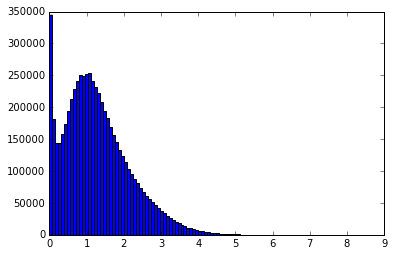

In [27]:
plt.hist(s[s>0] ,bins=100);plt.show()

In [28]:
new_train_test_num[col]=s.astype(np.float32)

In [29]:
i=4
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_4


count    6.582476e+06
mean    -5.568669e-05
std      1.313941e-04
min     -8.603012e-05
25%     -7.999417e-05
50%     -7.003939e-05
75%     -5.182868e-05
max      1.030886e-01
Name: f_4, dtype: float64

In [30]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.031605e+00
std      7.623327e-01
min      0.000000e+00
25%      4.722480e-01
50%      9.551548e-01
75%      1.486172e+00
max      9.241690e+00
Name: f_4, dtype: float64

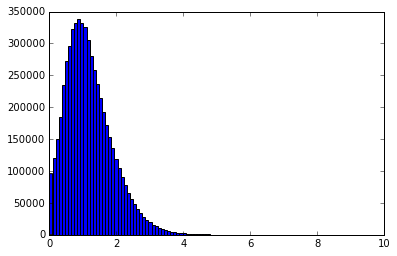

In [31]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [32]:
new_train_test_num[col]=s.astype(np.float32)

In [33]:
i=5
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_5


count    6.582476e+06
mean     4.546707e+00
std      1.993182e+00
min      2.081243e+00
25%      2.859509e+00
50%      4.191009e+00
75%      5.681114e+00
max      1.239677e+01
Name: f_5, dtype: float64

In [34]:
s.value_counts()

4.191009     860337
4.784060     858516
3.457174     764697
2.859509     760869
2.279448     723398
5.681114     706413
6.361315     578685
7.289782     377140
2.081243     371991
7.959006     276332
8.761997     122007
9.461600      79456
10.057556     60658
10.777588     28476
11.567393      9782
11.860284      1912
12.396774       794
11.412979       454
11.452941       236
9.220690        185
8.194030         84
7.782048         54
Name: f_5, dtype: int64

In [35]:
new_train_test_num[col]=s.astype(np.float32)

In [36]:
i=6
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_6


count    6.582476e+06
mean    -8.582677e-05
std      2.754388e-06
min     -8.603012e-05
25%     -8.603012e-05
50%     -8.603012e-05
75%     -8.603012e-05
max      1.102763e-03
Name: f_6, dtype: float64

In [37]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.711867e-02
std      1.106502e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.786486e+00
Name: f_6, dtype: float64

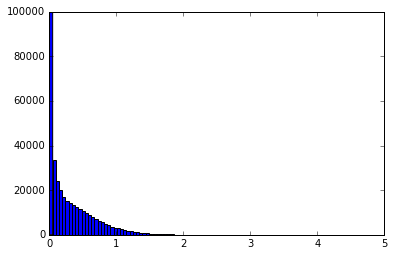

In [38]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [39]:
new_train_test_num[col]=s.astype(np.float32)

In [40]:
i=7
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_7


count    6.582476e+06
mean     4.552271e+00
std      5.231619e-01
min      2.583333e+00
25%      4.301865e+00
50%      4.575562e+00
75%      4.996416e+00
max      7.228070e+00
Name: f_7, dtype: float64

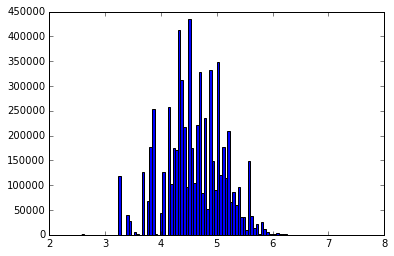

In [41]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [42]:
new_train_test_num[col]=s.astype(np.float32)

In [43]:
i=8
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_8


count    6.582476e+06
mean    -8.593656e-05
std      2.115668e-07
min     -8.603012e-05
25%     -8.585781e-05
50%     -8.582549e-05
75%     -8.574293e-05
max      4.492843e-05
Name: f_8, dtype: float64

In [44]:
s=(s-s.min())*1e7
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.209150e+00
std      2.815726e-01
min      0.000000e+00
25%      1.001795e+00
50%      1.113925e+00
75%      1.353762e+00
max      7.178229e+00
Name: f_8, dtype: float64

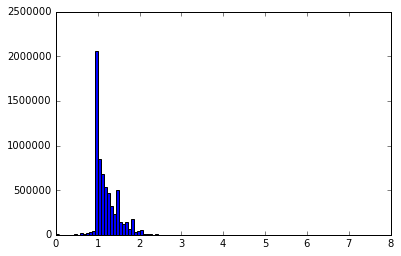

In [45]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [46]:
new_train_test_num[col]=s.astype(np.float32)

In [47]:
i=9
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_9


count    6.582476e+06
mean     4.401881e+00
std      1.994640e-01
min      4.453134e+00
25%      4.567978e+00
50%      4.622887e+00
75%      4.622887e+00
max      4.622887e+00
Name: f_9, dtype: float64

In [48]:
new_train_test_num[col]=s.astype(np.float32)

In [49]:
i=10
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_10


count    6.582476e+06
mean    -8.524193e-05
std      1.640381e-05
min     -8.603012e-05
25%     -8.603012e-05
50%     -8.603012e-05
75%     -8.603012e-05
max      1.262040e-02
Name: f_10, dtype: float64

In [50]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     3.944290e-02
std      2.284017e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.148065e+00
Name: f_10, dtype: float64

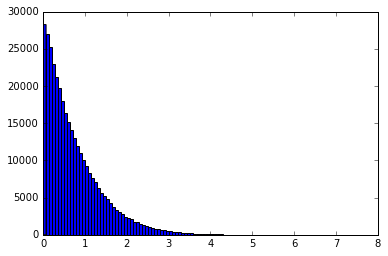

In [51]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [52]:
new_train_test_num[col]=s.astype(np.float32)

In [53]:
i=11
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_11


count    6.582476e+06
mean    -5.935579e-05
std      5.816056e-04
min     -8.603012e-05
25%     -8.529168e-05
50%     -8.227841e-05
75%     -6.508364e-05
max      8.924999e-01
Name: f_11, dtype: float64

In [54]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     7.153133e-01
std      8.751238e-01
min      0.000000e+00
25%      7.124513e-02
50%      3.185780e-01
75%      1.129674e+00
max      1.139930e+01
Name: f_11, dtype: float64

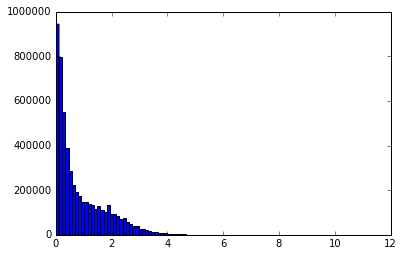

In [55]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [56]:
new_train_test_num[col]=s.astype(np.float32)

In [57]:
i=12
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_12


count    6.582476e+06
mean    -5.247866e-05
std      1.502038e-04
min     -8.603012e-05
25%     -7.790486e-05
50%     -6.789831e-05
75%     -4.872035e-05
max      1.030886e-01
Name: f_12, dtype: float64

In [58]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.116892e+00
std      7.460714e-01
min      0.000000e+00
25%      5.947216e-01
50%      1.034316e+00
75%      1.554132e+00
max      9.241690e+00
Name: f_12, dtype: float64

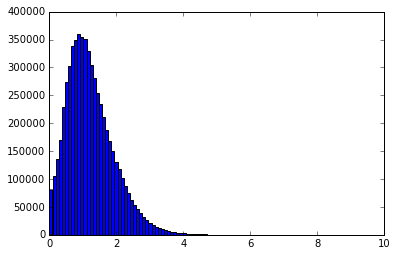

In [59]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [60]:
new_train_test_num[col]=s.astype(np.float32)

In [61]:
i=13
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_13


count    6.582476e+06
mean    -2.791416e-05
std      2.447516e-04
min     -8.603012e-05
25%     -7.396815e-05
50%     -6.039843e-05
75%     -2.888184e-05
max      3.200599e-01
Name: f_13, dtype: float64

In [62]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.417750e+00
std      8.636731e-01
min      0.000000e+00
25%      7.912704e-01
50%      1.270650e+00
75%      1.904318e+00
max      1.037398e+01
Name: f_13, dtype: float64

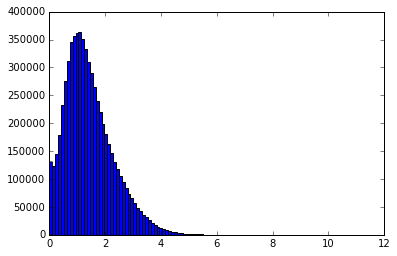

In [63]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [64]:
new_train_test_num[col]=s.astype(np.float32)

In [65]:
i=14
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_14


count    6.582476e+06
mean    -1.980626e-06
std      1.326741e-04
min     -8.603012e-05
25%     -6.498559e-05
50%     -3.669912e-05
75%      1.316754e-05
max      9.367272e-02
Name: f_14, dtype: float64

In [66]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.756657e+00
std      9.793101e-01
min      0.000000e+00
25%      1.132837e+00
50%      1.780547e+00
75%      2.390575e+00
max      9.146002e+00
Name: f_14, dtype: float64

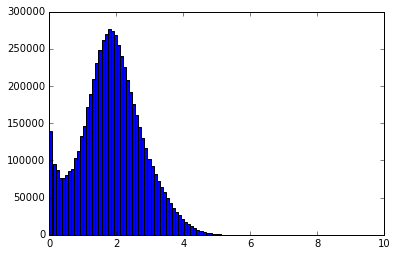

In [67]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [68]:
new_train_test_num[col]=s.astype(np.float32)

In [69]:
i=15
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_15


count    6.582476e+06
mean    -5.003970e-05
std      4.081486e-04
min     -8.603012e-05
25%     -7.615826e-05
50%     -6.650826e-05
75%     -4.717477e-05
max      6.796578e-01
Name: f_15, dtype: float64

In [70]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.192434e+00
std      6.987202e-01
min      0.000000e+00
25%      6.867199e-01
50%      1.082546e+00
75%      1.586279e+00
max      1.112690e+01
Name: f_15, dtype: float64

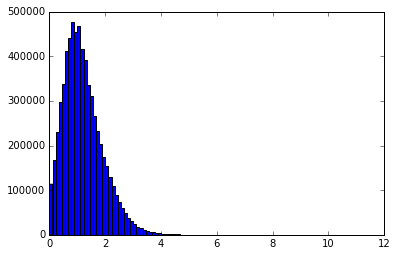

In [71]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [72]:
new_train_test_num[col]=s.astype(np.float32)

In [73]:
i=16
col=columns[i]
print col
s=new_train_test_num[col]
#print set(s)
s.describe()

f_16


count    6.582476e+06
mean     4.389048e+00
std      3.299359e-01
min      2.031324e+00
25%      4.564527e+00
50%      4.582530e+00
75%      4.582530e+00
max      4.985719e+00
Name: f_16, dtype: float64

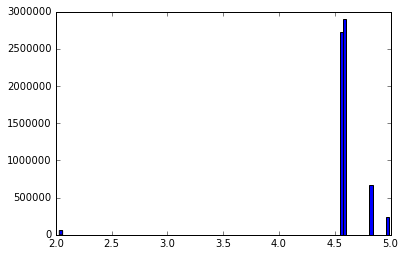

In [74]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [75]:
new_train_test_num[col]=s.astype(np.float32)

In [76]:
i=17
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_17


count    6.582476e+06
mean    -3.941025e-05
std      1.408948e-04
min     -4.821312e-02
25%     -8.034376e-05
50%     -6.474936e-05
75%     -3.450827e-05
max      5.528273e-02
Name: f_17, dtype: float64

In [77]:
s=(s-s.min())*1e2
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.760849e+00
std      2.524326e-03
min      0.000000e+00
25%      1.760145e+00
50%      1.760413e+00
75%      1.760933e+00
max      2.429181e+00
Name: f_17, dtype: float64

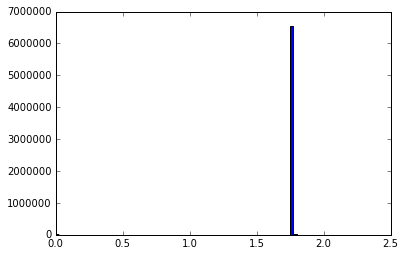

In [78]:
#print set(s)
plt.hist(s   ,bins=100);plt.show()

In [79]:
new_train_test_num[col]=s.astype(np.float32)

In [80]:
i=18
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_18


count    6.582476e+06
mean    -5.832485e-05
std      7.155433e-05
min     -8.603012e-05
25%     -8.223921e-05
50%     -7.535679e-05
75%     -6.052705e-05
max      1.314866e-02
Name: f_18, dtype: float64

In [81]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     9.031724e-01
std      7.794198e-01
min      0.000000e+00
25%      3.214247e-01
50%      7.262593e-01
75%      1.267034e+00
max      7.188767e+00
Name: f_18, dtype: float64

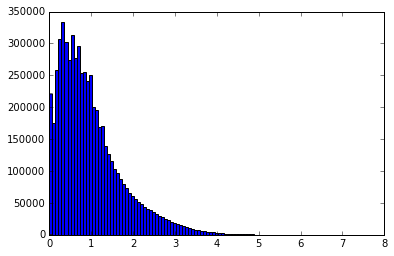

In [82]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [83]:
new_train_test_num[col]=s.astype(np.float32)

In [84]:
i=19
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_19


count    6.582476e+06
mean     4.403661e+00
std      1.858056e-01
min      4.593762e+00
25%      4.593762e+00
50%      4.593762e+00
75%      4.593762e+00
max      4.593762e+00
Name: f_19, dtype: float64

set([4.5937619])


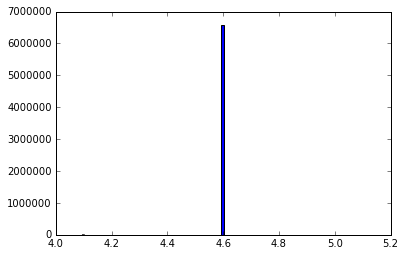

In [85]:
print set(s)
plt.hist(s[s>0]  ,bins=100);plt.show()

In [86]:
new_train_test_num.drop(col,axis=1,inplace=True)

In [87]:
i=20
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_20


count    6.582476e+06
mean     4.329802e+00
std      3.345454e-01
min      4.289409e+00
25%      4.461272e+00
50%      4.517968e+00
75%      4.780698e+00
max      4.890327e+00
Name: f_20, dtype: float64

In [88]:
s.value_counts()

4.780698    1588907
4.289409    1177413
4.890327    1141861
4.461272    1010039
4.480989     885414
4.517968     778842
Name: f_20, dtype: int64

In [89]:
new_train_test_num[col]=s.astype(np.float32)

In [90]:
i=21
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_21


count    6.582476e+06
mean    -7.506793e-05
std      2.624220e-06
min     -1.001599e-04
25%     -7.758674e-05
50%     -7.579070e-05
75%     -7.427832e-05
max     -6.586940e-05
Name: f_21, dtype: float64

In [91]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.224937e+00
std      7.322925e-02
min      0.000000e+00
25%      1.180902e+00
50%      1.234575e+00
75%      1.277638e+00
max      1.488184e+00
Name: f_21, dtype: float64

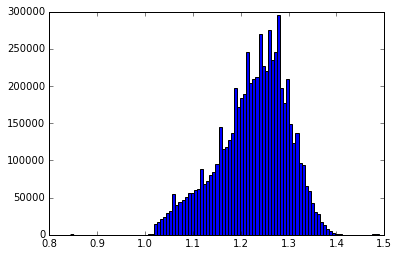

In [92]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [93]:
new_train_test_num[col]=s.astype(np.float32)

In [94]:
i=22
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_22


count    6.582476e+06
mean    -6.387616e-05
std      1.083901e-04
min     -8.603012e-05
25%     -8.447930e-05
50%     -7.516622e-05
75%     -6.007965e-05
max      1.030886e-01
Name: f_22, dtype: float64

In [95]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     8.315676e-01
std      7.425159e-01
min      0.000000e+00
25%      1.441719e-01
50%      7.354353e-01
75%      1.279557e+00
max      9.241690e+00
Name: f_22, dtype: float64

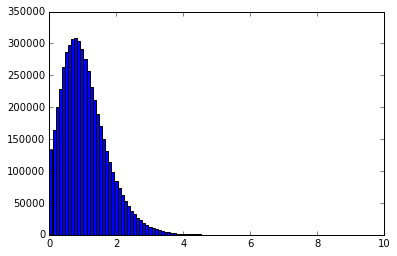

In [96]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [97]:
new_train_test_num[col]=s.astype(np.float32)

In [98]:
i=23
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_23


count    6.582476e+06
mean     4.408436e+00
std      3.431687e-01
min      3.922724e+00
25%      4.582445e+00
50%      4.702752e+00
75%      4.753404e+00
max      5.008216e+00
Name: f_23, dtype: float64

In [99]:
new_train_test_num[col]=s.astype(np.float32)

In [100]:
i=24
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_24


count    6.582476e+06
mean     4.446218e+00
std      3.586653e-01
min      4.286038e+00
25%      4.286038e+00
50%      4.329314e+00
75%      4.912832e+00
max      5.040876e+00
Name: f_24, dtype: float64

5


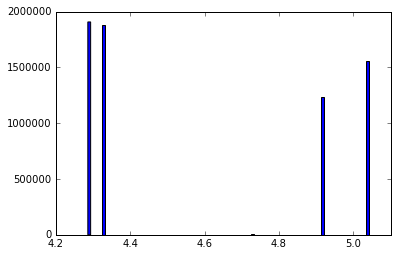

In [101]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [102]:
new_train_test_num[col]=s.astype(np.float32)

In [103]:
i=25
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_25


count    6.582476e+06
mean     1.652105e-04
std      8.699400e-04
min     -8.603012e-05
25%     -7.131451e-05
50%     -1.417523e-05
75%      1.559122e-04
max      3.011288e-01
Name: f_25, dtype: float64

In [104]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     2.124835e+00
std      1.480070e+00
min      0.000000e+00
25%      9.048499e-01
50%      2.102363e+00
75%      3.226615e+00
max      1.031303e+01
Name: f_25, dtype: float64

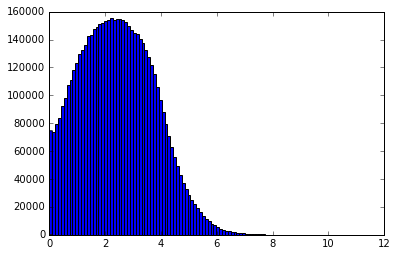

In [105]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [106]:
new_train_test_num[col]=s.astype(np.float32)

In [107]:
i=26
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_26


count    6.582476e+06
mean    -2.820717e-05
std      6.967740e-04
min     -9.942751e-02
25%     -7.586360e-05
50%     -5.886196e-05
75%     -2.224937e-05
max      1.291837e+00
Name: f_26, dtype: float64

In [108]:
s=(s-s.min())*1e2
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     2.392412e+00
std      3.695847e-03
min      0.000000e+00
25%      2.391984e+00
50%      2.392139e+00
75%      2.392474e+00
max      4.942545e+00
Name: f_26, dtype: float64

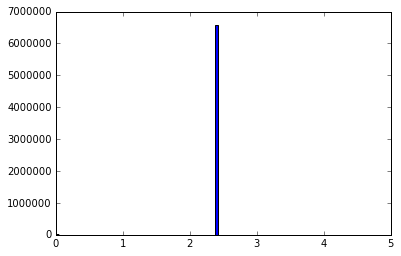

In [109]:
plt.hist(s   ,bins=100);plt.show()

In [110]:
new_train_test_num[col]=s.astype(np.float32)

In [111]:
i=27
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_27


count    6.582476e+06
mean    -7.796617e-05
std      6.843253e-04
min     -9.942751e-02
25%     -8.603012e-05
50%     -8.603012e-05
75%     -8.603012e-05
max      1.291837e+00
Name: f_27, dtype: float64

In [112]:
s=(s-s.min())*1e2
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     2.391984e+00
std      3.464127e-03
min      0.000000e+00
25%      2.391891e+00
50%      2.391891e+00
75%      2.391891e+00
max      4.942545e+00
Name: f_27, dtype: float64

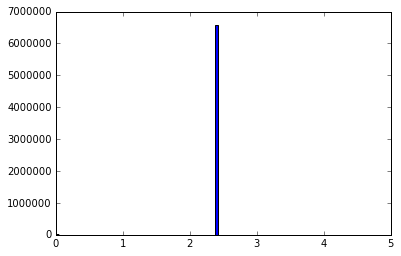

In [113]:
plt.hist(s   ,bins=100);plt.show()

In [114]:
new_train_test_num[col]=s.astype(np.float32)

In [115]:
i=28
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_28


count    6.582476e+06
mean     9.843403e-01
std      8.877490e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: f_28, dtype: float64

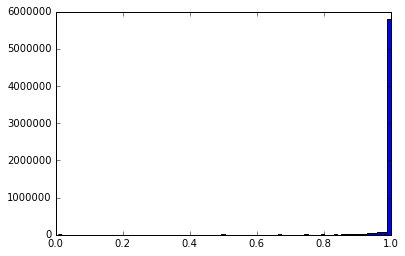

In [116]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [117]:
new_train_test_num[col]=s.astype(np.float32)

In [118]:
i=29
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_29


count    6.582476e+06
mean     4.428238e+00
std      1.978662e-01
min      4.517045e+00
25%      4.517045e+00
50%      4.643417e+00
75%      4.643417e+00
max      5.165935e+00
Name: f_29, dtype: float64

In [119]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [120]:
new_train_test_num[col]=s.astype(np.float32)

In [121]:
i=30
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_30


count    6.582476e+06
mean    -5.078566e-05
std      1.417259e-04
min     -8.603012e-05
25%     -7.631607e-05
50%     -6.659915e-05
75%     -4.726473e-05
max      1.030886e-01
Name: f_30, dtype: float64

In [122]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.179455e+00
std      7.080358e-01
min      0.000000e+00
25%      6.787467e-01
50%      1.079463e+00
75%      1.584436e+00
max      9.241690e+00
Name: f_30, dtype: float64

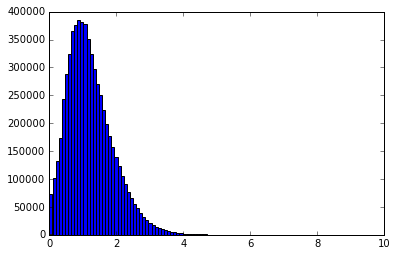

In [123]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [124]:
new_train_test_num[col]=s.astype(np.float32)

In [125]:
i=31
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_31


count    6.582476e+06
mean     4.633522e+00
std      9.357244e-01
min      3.779743e+00
25%      3.779743e+00
50%      4.439895e+00
75%      5.095650e+00
max      8.848014e+00
Name: f_31, dtype: float64

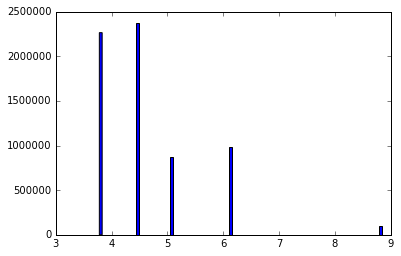

In [126]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [127]:
new_train_test_num[col]=s.astype(np.float32)

In [128]:
i=32
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_32


count    6.582476e+06
mean    -6.395609e-05
std      7.590542e-05
min     -8.603012e-05
25%     -8.603012e-05
50%     -8.603012e-05
75%     -8.176926e-05
max      9.801685e-03
Name: f_32, dtype: float64

In [129]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     4.906625e-01
std      9.548802e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.549336e-01
max      6.897474e+00
Name: f_32, dtype: float64

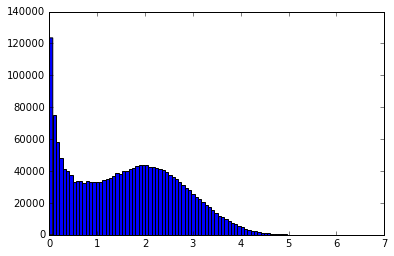

In [130]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [131]:
new_train_test_num[col]=s.astype(np.float32)

In [132]:
i=33
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_33


count    6.582476e+06
mean     4.446721e+00
std      4.824353e-01
min      2.565990e+00
25%      4.272411e+00
50%      4.593935e+00
75%      4.889631e+00
max      6.070300e+00
Name: f_33, dtype: float64

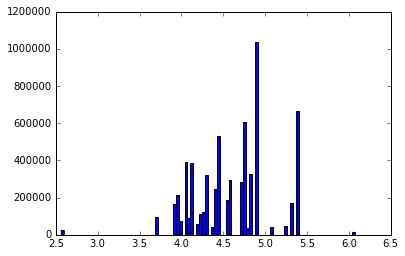

In [133]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [134]:
new_train_test_num[col]=s.astype(np.float32)

In [135]:
i=34
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_34


count    6.582476e+06
mean    -8.597520e-05
std      3.266216e-06
min     -2.074532e-03
25%     -8.603012e-05
50%     -8.603012e-05
75%     -8.603012e-05
max      1.637109e-03
Name: f_34, dtype: float64

In [136]:
s=(s-s.min())*1e3
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.094792e+00
std      1.114489e-03
min      0.000000e+00
25%      1.094772e+00
50%      1.094772e+00
75%      1.094772e+00
max      1.550036e+00
Name: f_34, dtype: float64

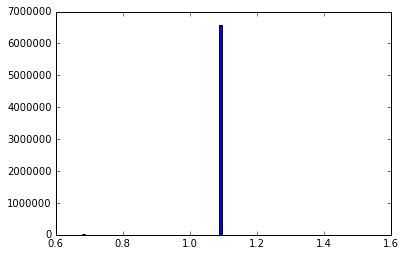

In [137]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [138]:
new_train_test_num[col]=s.astype(np.float32)

In [139]:
i=35
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_35


count    6.582476e+06
mean    -8.587611e-05
std      6.466848e-07
min     -8.603012e-05
25%     -8.592129e-05
50%     -8.569679e-05
75%     -8.546033e-05
max      3.828360e-04
Name: f_35, dtype: float64

In [140]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     4.162747e-02
std      4.621424e-02
min      0.000000e+00
25%      1.082458e-02
50%      3.278983e-02
75%      5.541460e-02
max      3.868836e+00
Name: f_35, dtype: float64

In [141]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [142]:
new_train_test_num[col]=s.astype(np.float32)

In [143]:
i=36
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_36


count    6.582476e+06
mean     8.407832e-04
std      3.070559e-03
min     -8.603012e-05
25%     -1.973235e-05
50%      1.741639e-04
75%      7.996002e-04
max      1.115227e+00
Name: f_36, dtype: float64

In [144]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     3.251276e+00
std      1.667932e+00
min      0.000000e+00
25%      2.032059e+00
50%      3.296555e+00
75%      4.494943e+00
max      1.162207e+01
Name: f_36, dtype: float64

In [145]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [146]:
new_train_test_num[col]=s.astype(np.float32)

In [147]:
i=37
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_37


count    6.582476e+06
mean    -8.220744e-05
std      4.451187e-05
min     -8.603012e-05
25%     -8.603012e-05
50%     -8.603012e-05
75%     -8.603012e-05
max      1.262873e-02
Name: f_37, dtype: float64

In [148]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     9.121079e-02
std      4.709188e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.148720e+00
Name: f_37, dtype: float64

In [149]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [150]:
new_train_test_num[col]=s.astype(np.float32)

In [151]:
i=38
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_38


count    6.582476e+06
mean    -7.677331e-05
std      2.247056e-04
min     -8.603012e-05
25%     -8.603012e-05
50%     -8.603012e-05
75%     -8.534086e-05
max      3.200599e-01
Name: f_38, dtype: float64

In [152]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     2.763979e-01
std      6.604221e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.665429e-02
max      1.037398e+01
Name: f_38, dtype: float64

In [153]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [154]:
new_train_test_num[col]=s.astype(np.float32)

In [155]:
i=39
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_39


count    6.582476e+06
mean    -8.585778e-05
std      4.381915e-06
min     -8.603012e-05
25%     -8.603012e-05
50%     -8.603012e-05
75%     -8.603012e-05
max      4.101197e-03
Name: f_39, dtype: float64

In [156]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     1.739734e-02
std      1.101936e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.039594e+00
Name: f_39, dtype: float64

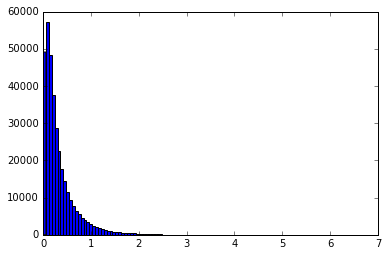

In [157]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [158]:
new_train_test_num[col]=s.astype(np.float32)

In [159]:
i=41
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_41


count    6.582476e+06
mean     3.977109e-04
std      1.642796e-03
min     -8.603012e-05
25%     -5.406589e-05
50%      5.064612e-05
75%      3.767065e-04
max      5.678342e-01
Name: f_41, dtype: float64

In [160]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    6.582476e+06
mean     2.655340e+00
std      1.608309e+00
min      0.000000e+00
25%      1.434232e+00
50%      2.685643e+00
75%      3.855953e+00
max      1.094717e+01
Name: f_41, dtype: float64

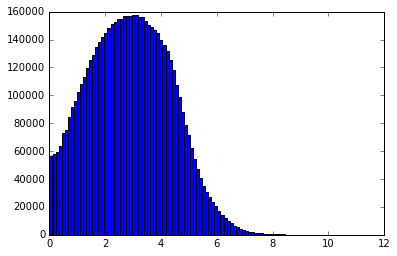

In [161]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [162]:
new_train_test_num[col]=s.astype(np.float32)

In [163]:
new_train_test_num.head()

market  date       f_0       f_1       f_2       f_3       f_4  \
id                                                                           
10000000  3.981910    11  4.084971  4.256005  4.576220  0.011423  0.023838   
10000001  4.600824    11  4.572433  4.589514  4.622002  1.042093  0.922797   
10000002  4.266003    11  4.357457  4.589514  4.576220  1.441485  1.664050   
10000003  4.600824    11  4.434495  4.589514  4.576220  0.721977  0.306136   
10000004  4.600824    11  4.659207  4.589514  4.576220  1.201324  0.776684   

               f_5       f_6       f_7   ...        f_33      f_34      f_35  \
id                                       ...                                   
10000000  2.279448  0.000000  4.327717   ...    4.142281  1.094772  0.066654   
10000001  4.191009  0.000000  4.336779   ...    5.386628  1.094772  0.035031   
10000002  7.959006  0.006247  4.385122   ...    3.936905  1.094772  0.051891   
10000003  2.859509  0.000000  4.336779   ...    4.052608  1.094772  0.004912   
10000004  2.859509  0.000000  4.336779   ...    4.889631  1.094772  0.023838   

              f_36      f_37      f_38  f_39      f_40      f_41  target  
id                                                                        
10000000  0.028315  0.000000  0.000000   0.0 -0.000086  0.028315       1  
10000001  5.008832  0.000000  0.000000   0.0  0.000027  4.340426       4  
10000002  3.301875  0.142815  0.900149   0.0 -0.000047  3.197605       6  
10000003  2.151937  0.000000  0.000000   0.0 -0.000081  1.510172       2  
10000004  2.323554  0.000000  0.000000   0.0 -0.000064  2.175413       5  

[5 rows x 44 columns]

In [164]:
new_train_test_num.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6582476 entries, 10000000 to 1378520
Columns: 44 entries, market to target
dtypes: float32(42), int8(2)
memory usage: 1.4 GB


In [165]:
%time fastparquet.write('../input/train_test_num_net_step1.parq', new_train_test_num, compression='SNAPPY')

CPU times: user 4.2 s, sys: 1.51 s, total: 5.71 s
Wall time: 6.21 s
